In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

import pickle
import itertools

sc.settings.verbosity = 3
sc.logging.print_header()

import warnings
warnings.filterwarnings("ignore")

/root/data1/GY/Mambaforge/envs/openbiomed/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.26.3 scipy==1.11.4 pandas==2.2.0 scikit-learn==1.4.0 statsmodels==0.14.1 igraph==0.11.8 pynndescent==0.5.11


# Load adata

In [3]:
infer_adata = sc.read_h5ad('../fig4/l1000_mdmt_HDACi.h5ad')
infer_adata.obs["pert_dose_idx"] = infer_adata.obs["pert_dose_idx"].astype("category")
infer_adata.obs["pert_dose_idx_c"] = infer_adata.obs["pert_dose_idx"].astype("float")

infer_adata

AnnData object with n_obs × n_vars = 3439 × 978
    obs: 'sample_id', 'bead_batch', 'nearest_dose', 'pert_dose', 'pert_dose_unit', 'pert_idose', 'pert_time', 'pert_itime', 'pert_time_unit', 'cell_mfc_name', 'pert_mfc_id', 'det_plate', 'det_well', 'rna_plate', 'rna_well', 'count_mean', 'count_cv', 'qc_f_logp', 'qc_iqr', 'qc_slope', 'pert_id', 'pert_type', 'cell_iname', 'qc_pass', 'dyn_range', 'inv_level_10', 'build_name', 'failure_mode', 'project_code', 'cmap_name', 'pert_dose_idx', 'n_replicates', 'pert_idx', 'cell_idx', 'tissue_idx', 'tissue', 'cell_pert_dose_time', 'pretrain_split', 'split_breast_1', 'split_breast_2', 'split_breast_3', 'split_breast_4', 'split_breast_5', 'split_lung_1', 'split_lung_2', 'split_lung_3', 'split_lung_4', 'split_lung_5', 'split_haematopoietic_and_lymphoid_tissue_1', 'split_haematopoietic_and_lymphoid_tissue_2', 'split_haematopoietic_and_lymphoid_tissue_3', 'split_haematopoietic_and_lymphoid_tissue_4', 'split_haematopoietic_and_lymphoid_tissue_5', 'pert_do

# load predict profile

In [4]:
predict_result_path = "../fig4/hdaci_predict/"

predict_profile = np.load(predict_result_path+'y_pred.npy')
infer_adata.obsm["X_predict"] = predict_profile

infer_adata

AnnData object with n_obs × n_vars = 3439 × 978
    obs: 'sample_id', 'bead_batch', 'nearest_dose', 'pert_dose', 'pert_dose_unit', 'pert_idose', 'pert_time', 'pert_itime', 'pert_time_unit', 'cell_mfc_name', 'pert_mfc_id', 'det_plate', 'det_well', 'rna_plate', 'rna_well', 'count_mean', 'count_cv', 'qc_f_logp', 'qc_iqr', 'qc_slope', 'pert_id', 'pert_type', 'cell_iname', 'qc_pass', 'dyn_range', 'inv_level_10', 'build_name', 'failure_mode', 'project_code', 'cmap_name', 'pert_dose_idx', 'n_replicates', 'pert_idx', 'cell_idx', 'tissue_idx', 'tissue', 'cell_pert_dose_time', 'pretrain_split', 'split_breast_1', 'split_breast_2', 'split_breast_3', 'split_breast_4', 'split_breast_5', 'split_lung_1', 'split_lung_2', 'split_lung_3', 'split_lung_4', 'split_lung_5', 'split_haematopoietic_and_lymphoid_tissue_1', 'split_haematopoietic_and_lymphoid_tissue_2', 'split_haematopoietic_and_lymphoid_tissue_3', 'split_haematopoietic_and_lymphoid_tissue_4', 'split_haematopoietic_and_lymphoid_tissue_5', 'pert_do

# Filtering vorinostat samples

In [5]:
v_adata = infer_adata[(infer_adata.obs.cmap_name=='vorinostat')]
# v_adata = v_adata[v_adata.obs.cell_iname.isin(list(dict(v_adata.obs.cell_iname.value_counts()).keys())[:10])]

v_data_deg_true = v_adata.copy()
v_data_deg_true.X = v_adata.X-v_adata.obsm['X_ctl']

v_data_deg_predict = v_adata.copy()
v_data_deg_predict.X = v_adata.obsm["X_predict"]-v_adata.obsm['X_ctl']

v_data_deg_true

AnnData object with n_obs × n_vars = 660 × 978
    obs: 'sample_id', 'bead_batch', 'nearest_dose', 'pert_dose', 'pert_dose_unit', 'pert_idose', 'pert_time', 'pert_itime', 'pert_time_unit', 'cell_mfc_name', 'pert_mfc_id', 'det_plate', 'det_well', 'rna_plate', 'rna_well', 'count_mean', 'count_cv', 'qc_f_logp', 'qc_iqr', 'qc_slope', 'pert_id', 'pert_type', 'cell_iname', 'qc_pass', 'dyn_range', 'inv_level_10', 'build_name', 'failure_mode', 'project_code', 'cmap_name', 'pert_dose_idx', 'n_replicates', 'pert_idx', 'cell_idx', 'tissue_idx', 'tissue', 'cell_pert_dose_time', 'pretrain_split', 'split_breast_1', 'split_breast_2', 'split_breast_3', 'split_breast_4', 'split_breast_5', 'split_lung_1', 'split_lung_2', 'split_lung_3', 'split_lung_4', 'split_lung_5', 'split_haematopoietic_and_lymphoid_tissue_1', 'split_haematopoietic_and_lymphoid_tissue_2', 'split_haematopoietic_and_lymphoid_tissue_3', 'split_haematopoietic_and_lymphoid_tissue_4', 'split_haematopoietic_and_lymphoid_tissue_5', 'pert_dos

# 3D surface plot

In [11]:
def get_gene_time_df(adata, gene_list):
    df = adata.obs
    for gene_name in gene_list:
        df.loc[:, gene_name] = adata[:, gene_name].X.flatten()
    return df

gene_list = ["HDAC6", "HDAC2", "NRIP1", "CDKN1A", "CDK1", "TP53", "BRCA1"]

df = get_gene_time_df(v_data_deg_predict, gene_list)
df["pert_time"] = df["pert_time"].astype("category")
pert_time_labels = df["pert_time"].cat.categories
df["pert_time_idx"] = df["pert_time"].cat.codes  
df["pert_dose_idx"] = df["pert_dose_idx"].astype("category")
pert_dose_labels = df["pert_dose_idx"].cat.categories
df["pert_dose_idx"] = df["pert_dose_idx"].cat.codes 

df.head()

,sample_id,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_itime,pert_time_unit,cell_mfc_name,...,pert_dose_idx_c,infer_split,HDAC6,HDAC2,NRIP1,CDKN1A,CDK1,TP53,BRCA1,pert_time_idx
cell_drug_dose_time,,,,,,,,,,,,,,,,,,,,,
22RV1:BRD-K81418486:24 h:0,ASG002_22RV1_24H_X1.A2_B35:G15,b35,0.12,0.1,uM,0.12 uM,24.0,24 h,h,22RV1,...,0.0,test,-0.099792,-0.014961,-0.374756,0.100159,-0.297852,-0.157837,-0.192383,2
22RV1:BRD-K81418486:24 h:4,ASG002_22RV1_24H_X1.A2_B35:G14,b35,1.11,1.0,uM,1.11 uM,24.0,24 h,h,22RV1,...,4.0,test,0.049438,0.107971,-0.159790,1.188477,-0.924805,-0.692871,-0.921387,2
22RV1:BRD-K81418486:24 h:8,ASG002_22RV1_24H_X1.A2_B35:G13;DTAK003_22RV1_2...,b35;b16,10.0,10.01;10.0,uM,10 uM,24.0,24 h,h,22RV1,...,8.0,test,0.943359,-0.783691,-1.100586,2.335938,-1.641602,-0.998535,-1.480469,2
A204:BRD-K81418486:24 h:0,ASG002_A204_24H_X1_B35:G15,b35,0.12,0.1,uM,0.12 uM,24.0,24 h,h,A204,...,0.0,test,0.193970,-0.156616,-0.529297,0.131470,0.004711,-0.161255,0.126831,2
A204:BRD-K81418486:24 h:4,ASG002_A204_24H_X1_B35:G14,b35,1.11,1.0,uM,1.11 uM,24.0,24 h,h,A204,...,4.0,test,-0.133789,-0.106140,-0.468506,1.214844,-0.525391,-0.998535,-0.741211,2


In [12]:
v_data_deg_true.obs.cell_iname.value_counts()

cell_iname
PC3      20
A549     18
MCF7     17
A375     17
HA1E     15
         ..
TYKNU     1
HT115     1
HMELZ     1
U937      1
SW480     1
Name: count, Length: 188, dtype: int64

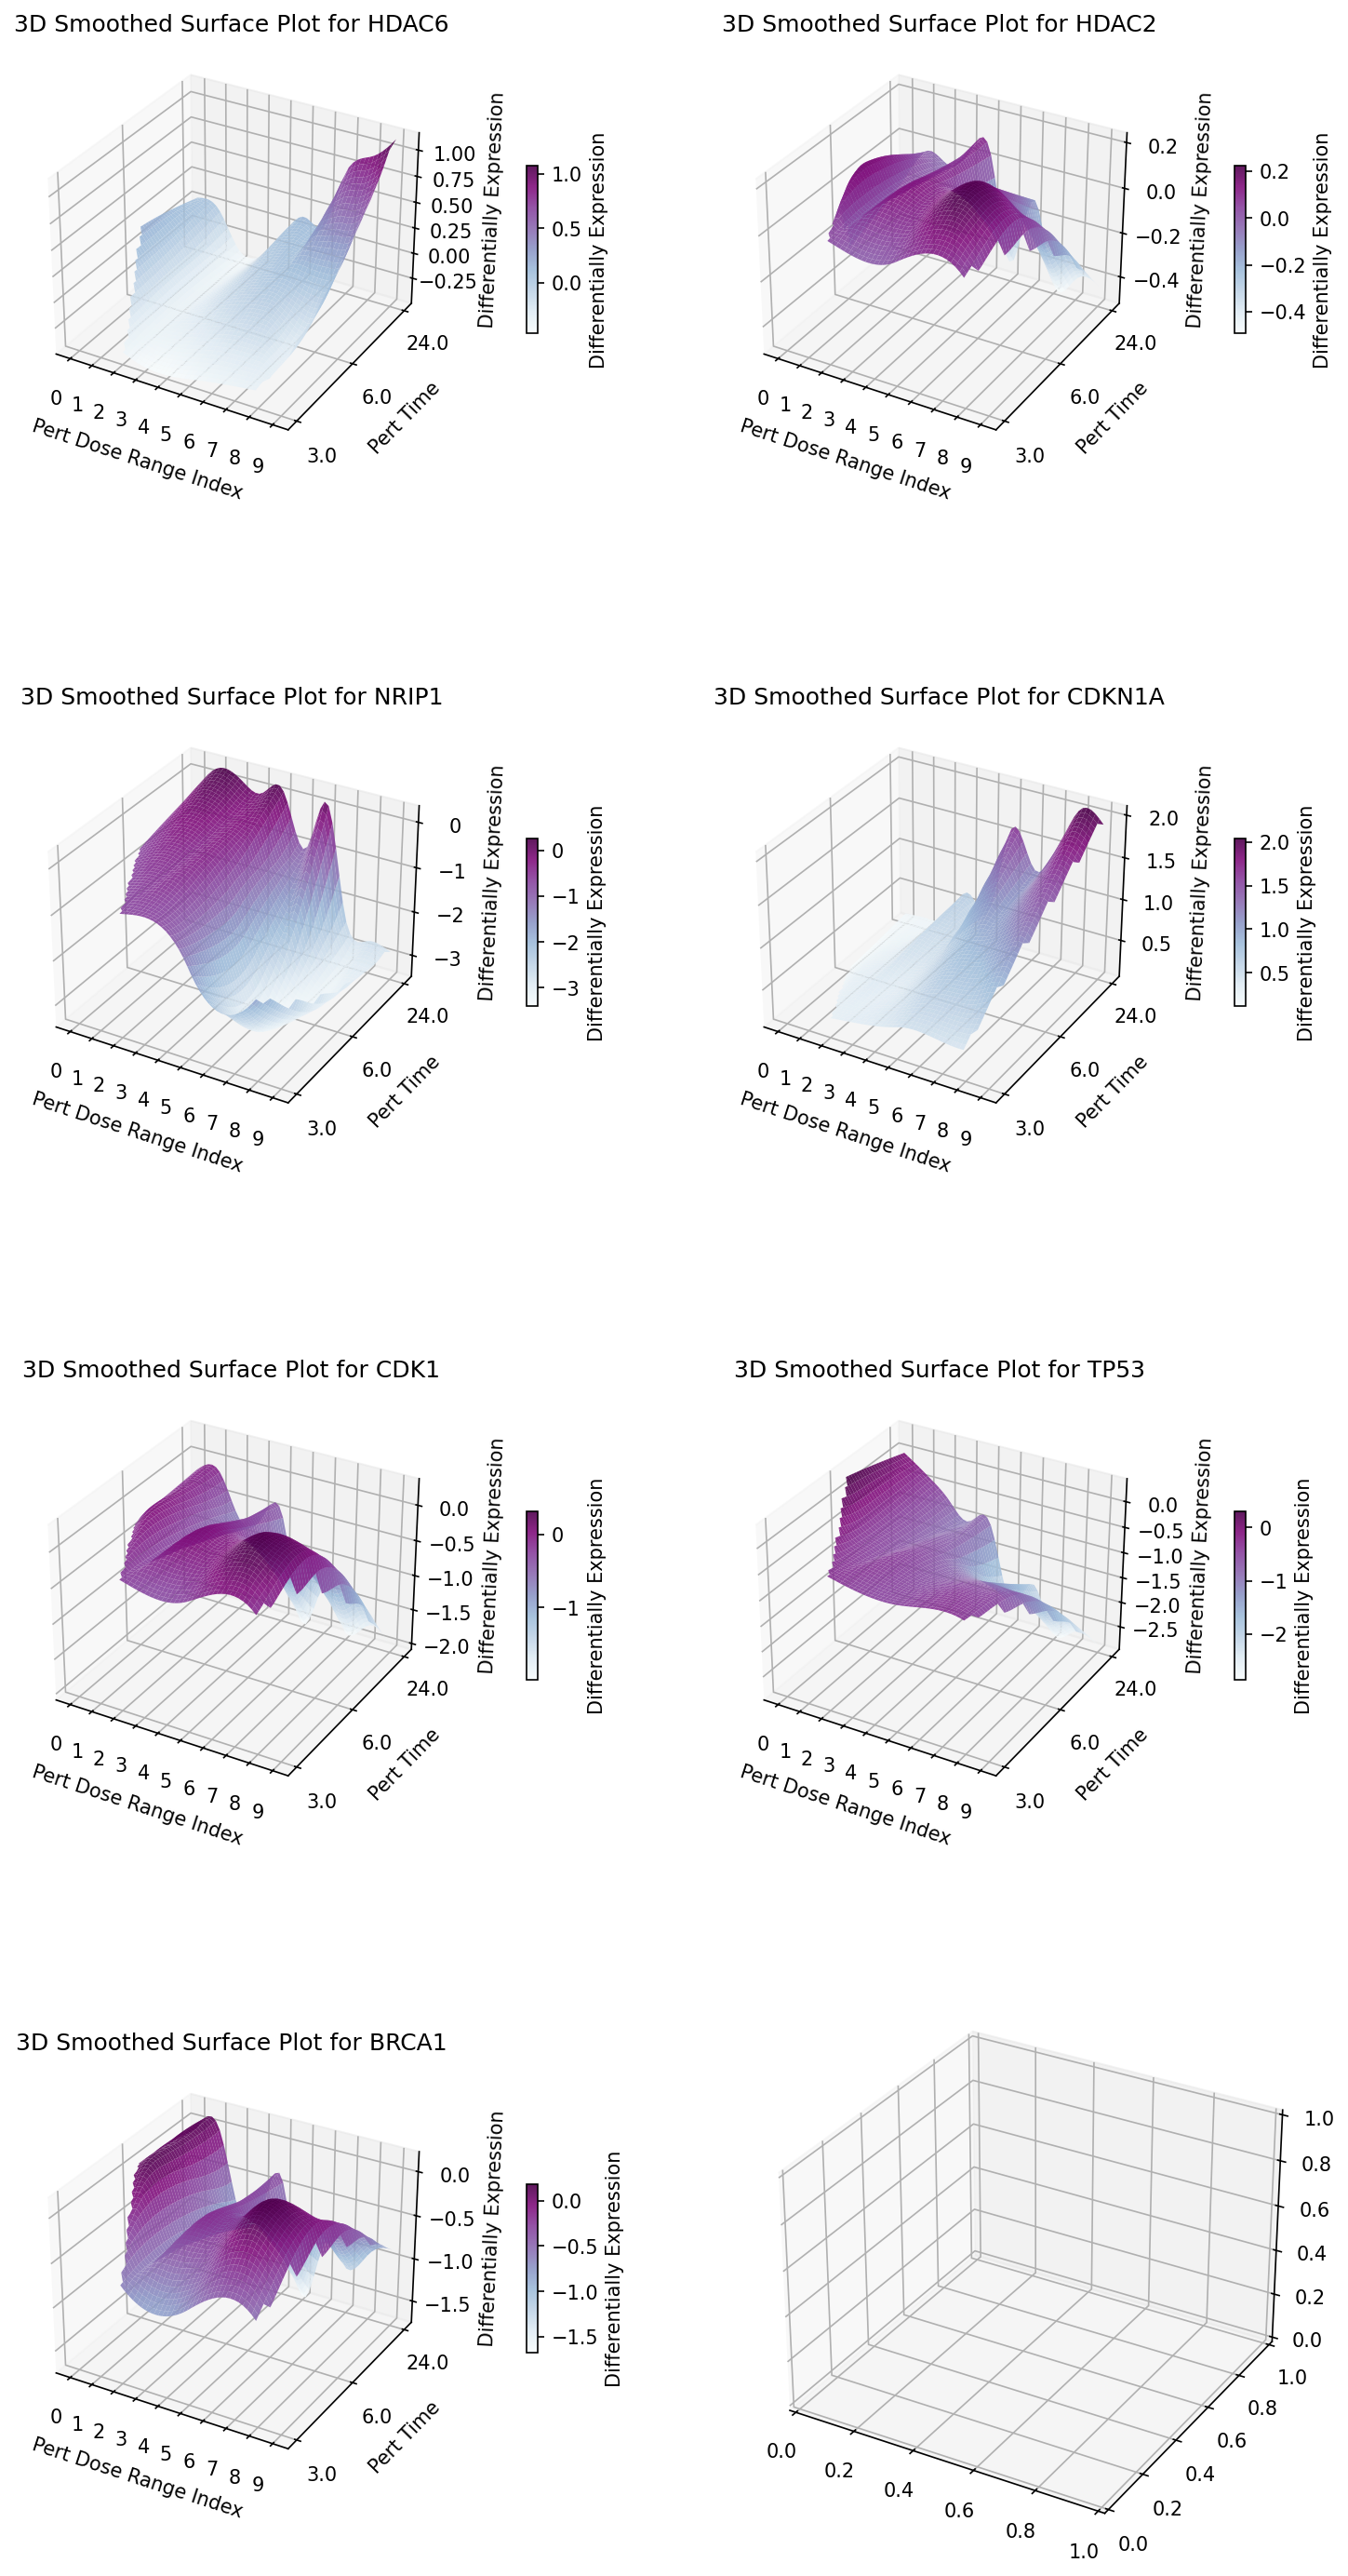

In [13]:
from scipy.interpolate import griddata

cell = 'A549'
df_filter = df[df.cell_iname == cell]

ncols = 2 
nrows = (len(gene_list) + 1) // 2 
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 6 * nrows), 
                         subplot_kw={'projection': '3d'}, dpi=150)
axes = axes.flatten()

if len(gene_list) == 1:
    axes = [axes]

for ax, gene_name in zip(axes, gene_list):
    
    X = df_filter["pert_dose_idx"].values
    Y = df_filter["pert_time_idx"].values
    Z = df_filter[gene_name].values

    X_unique = np.linspace(X.min(), X.max(), 50)
    Y_unique = np.linspace(Y.min(), Y.max(), 50)
    X_mesh, Y_mesh = np.meshgrid(X_unique, Y_unique)

    Z_mesh = griddata((X, Y), Z, (X_mesh, Y_mesh), method='cubic')
    
    ax_surface = ax.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap="BuPu", edgecolor='none', alpha=0.9)

    ax.set_xticks(range(len(pert_dose_labels)))
    ax.set_xticklabels(pert_dose_labels)
    
    ax.set_yticks(range(len(pert_time_labels)))
    ax.set_yticklabels(pert_time_labels)

    ax.set_xlabel("Pert Dose Range Index")
    ax.set_ylabel("Pert Time")
    ax.set_zlabel("Differentially Expression")
    ax.set_title(f"3D Smoothed Surface Plot for {gene_name}")

    fig.colorbar(ax_surface, ax=ax, shrink=0.3, aspect=15, pad=0.15, label="Differentially Expression")

plt.tight_layout()
plt.show()